In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os

import numpy as np
import torch
import librosa
from torch.nn import functional as F
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

from wavenet import model, train, datasets, sample, audio, utils, viz

In [3]:
os.environ['WANDB_MODE'] = 'dryrun'

In [4]:
p, n_examples, n_samples = model.HParams(n_audio_chans=2, n_chans=128, n_layers=8, dilation_stacks=2), 2**4, 4
ds = audio.load_dataset_from_track('data/aria.wav', p)[:n_examples]
X, X_test = datasets.preprocess(ds, p)

In [5]:
m = model.Wavenet(p)
t = train.Trainer(m, X, X_test, train.HParams(max_epochs=1, batch_size=8, num_workers=8), None)

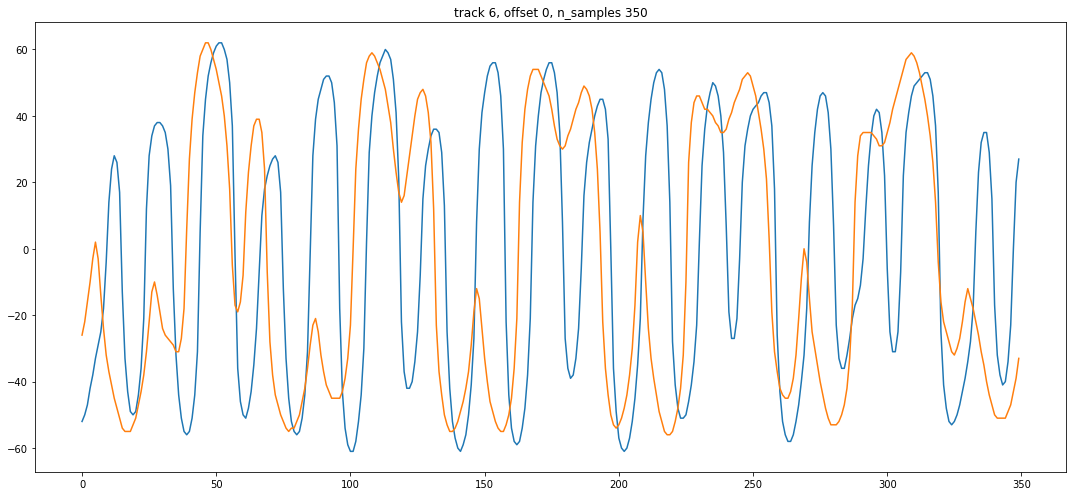

In [6]:
track_i = viz.plot_track(X)

In [7]:
t.train()

wandb: Offline run mode, not syncing to the cloud.
wandb: W&B syncing is set to `offline` in this directory.  Run `wandb online` to enable cloud syncing.
1:1 loss 5.84699 lr 2.435237e-04: 100%|██████████| 2/2 [00:50<00:00, 25.07s/it]


In [14]:
_, track = sample.sample(m, utils.decode_nucleus(), n_samples=100)

0

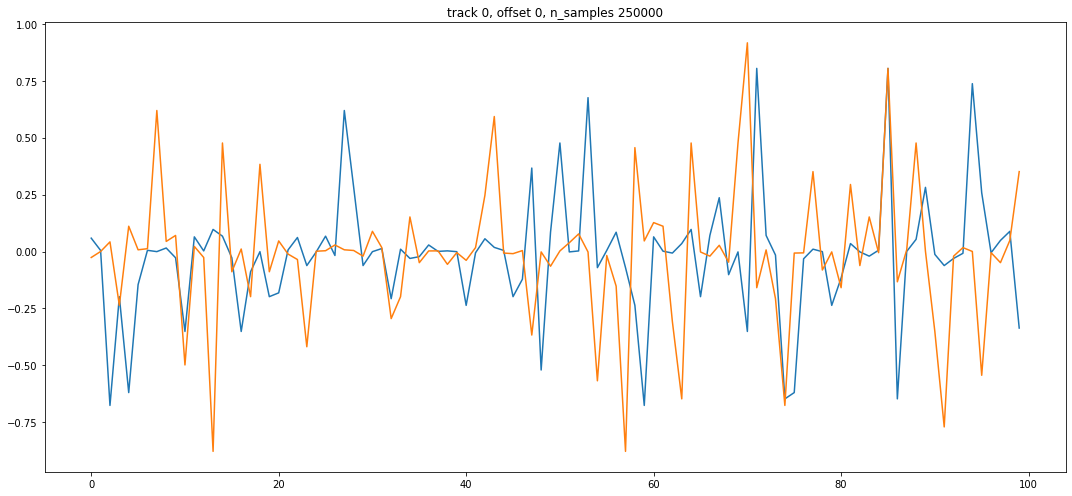

In [15]:
viz.plot_track(track, n_samples=250000)

In [16]:
ipd.Audio(audio.mu_expand(track[0], p), rate=p.sampling_rate)